In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, fft, ifft, idct
from noise import pnoise1  # Library for Perlin noise

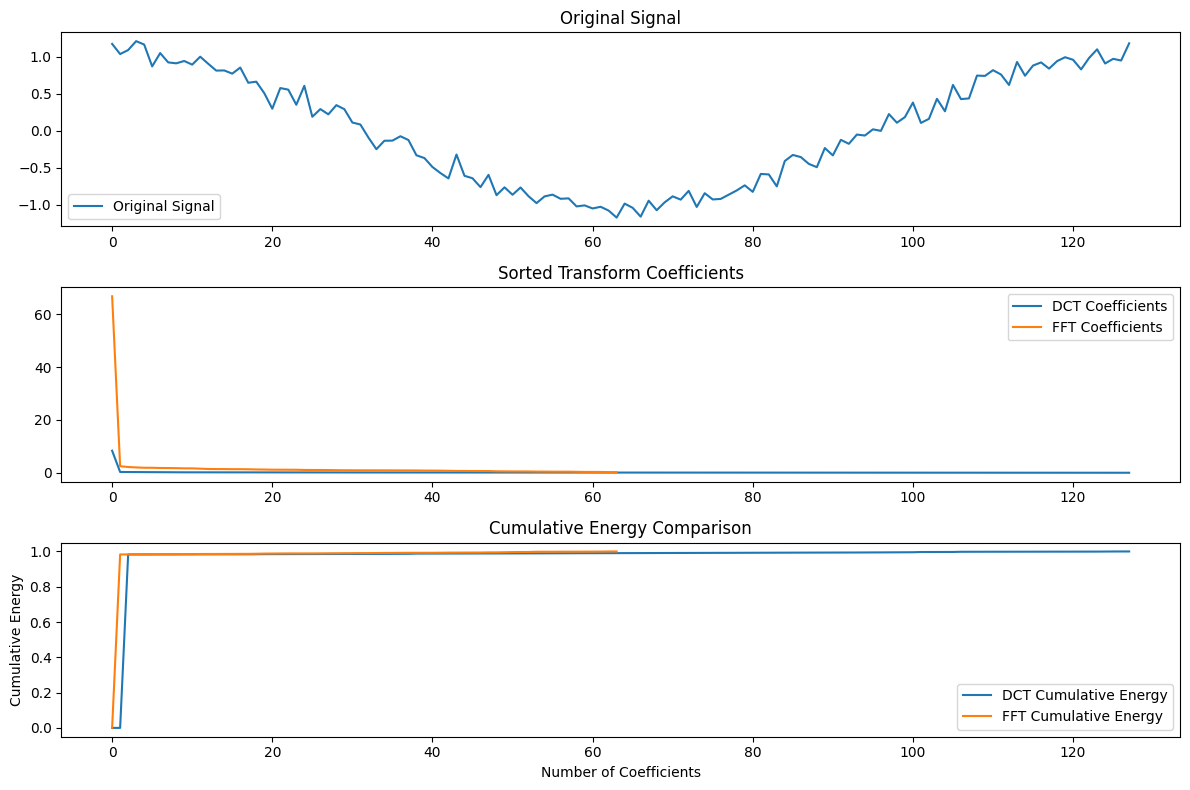

In [2]:
# Generate a simple signal (e.g., a cosine wave plus noise)
np.random.seed(0)
n = 128
x = np.cos(2 * np.pi * np.arange(n) / n) + 0.1 * np.random.randn(n)

# Compute the DCT and FFT
dct_coeffs = dct(x, type=2, norm='ortho')
fft_coeffs = fft(x)

# Calculate the magnitude of FFT coefficients (only half due to symmetry)
fft_coeffs_magnitude = np.abs(fft_coeffs[:n // 2])

# Compute the cumulative energy (normalized)
dct_cumulative_energy = np.cumsum(dct_coeffs**2) / np.sum(dct_coeffs**2)
fft_cumulative_energy = np.cumsum(fft_coeffs_magnitude**2) / np.sum(fft_coeffs_magnitude**2)

# Plot the original signal
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x, label="Original Signal")
plt.title("Original Signal")
plt.legend()

# Plot the sorted DCT and FFT coefficients
plt.subplot(3, 1, 2)
plt.plot(np.sort(np.abs(dct_coeffs))[::-1], label="DCT Coefficients")
plt.plot(np.sort(fft_coeffs_magnitude)[::-1], label="FFT Coefficients")
plt.title("Sorted Transform Coefficients")
plt.legend()

# Plot the cumulative energy
plt.subplot(3, 1, 3)
plt.plot(dct_cumulative_energy, label="DCT Cumulative Energy")
plt.plot(fft_cumulative_energy, label="FFT Cumulative Energy")
plt.title("Cumulative Energy Comparison")
plt.xlabel("Number of Coefficients")
plt.ylabel("Cumulative Energy")
plt.legend()

plt.tight_layout()
plt.show()


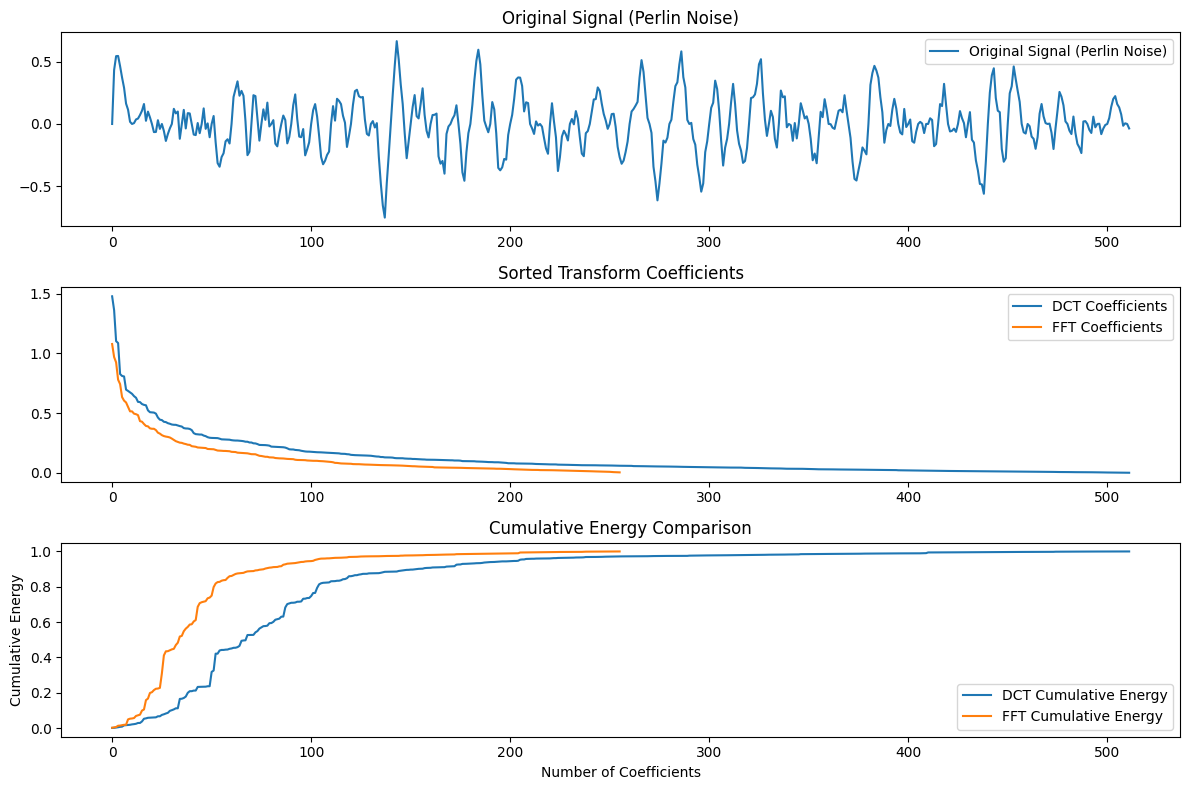

In [10]:
# Generate 1D Perlin noise
n = 512
x = np.array([pnoise1(i / 10.0, octaves=4) for i in range(n)])  # Perlin noise with 4 octaves

# Compute the DCT and FFT
dct_coeffs = dct(x, type=2, norm='ortho')
fft_coeffs = fft(x) / np.sqrt(n)

# Calculate the magnitude of FFT coefficients (only half due to symmetry)
fft_coeffs_magnitude = np.abs(fft_coeffs[:n // 2])

# Compute the cumulative energy (normalized)
dct_cumulative_energy = np.cumsum(dct_coeffs**2) / np.sum(dct_coeffs**2)
fft_cumulative_energy = np.cumsum(fft_coeffs_magnitude**2) / np.sum(fft_coeffs_magnitude**2)

# Plot the original signal
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x, label="Original Signal (Perlin Noise)")
plt.title("Original Signal (Perlin Noise)")
plt.legend()

# Plot the sorted DCT and FFT coefficients
plt.subplot(3, 1, 2)
plt.plot(np.sort(np.abs(dct_coeffs))[::-1], label="DCT Coefficients")
plt.plot(np.sort(fft_coeffs_magnitude)[::-1], label="FFT Coefficients")
plt.title("Sorted Transform Coefficients")
plt.legend()

# Plot the cumulative energy
plt.subplot(3, 1, 3)
plt.plot(dct_cumulative_energy, label="DCT Cumulative Energy")
plt.plot(fft_cumulative_energy, label="FFT Cumulative Energy")
plt.title("Cumulative Energy Comparison")
plt.xlabel("Number of Coefficients")
plt.ylabel("Cumulative Energy")
plt.legend()

plt.tight_layout()
plt.show()


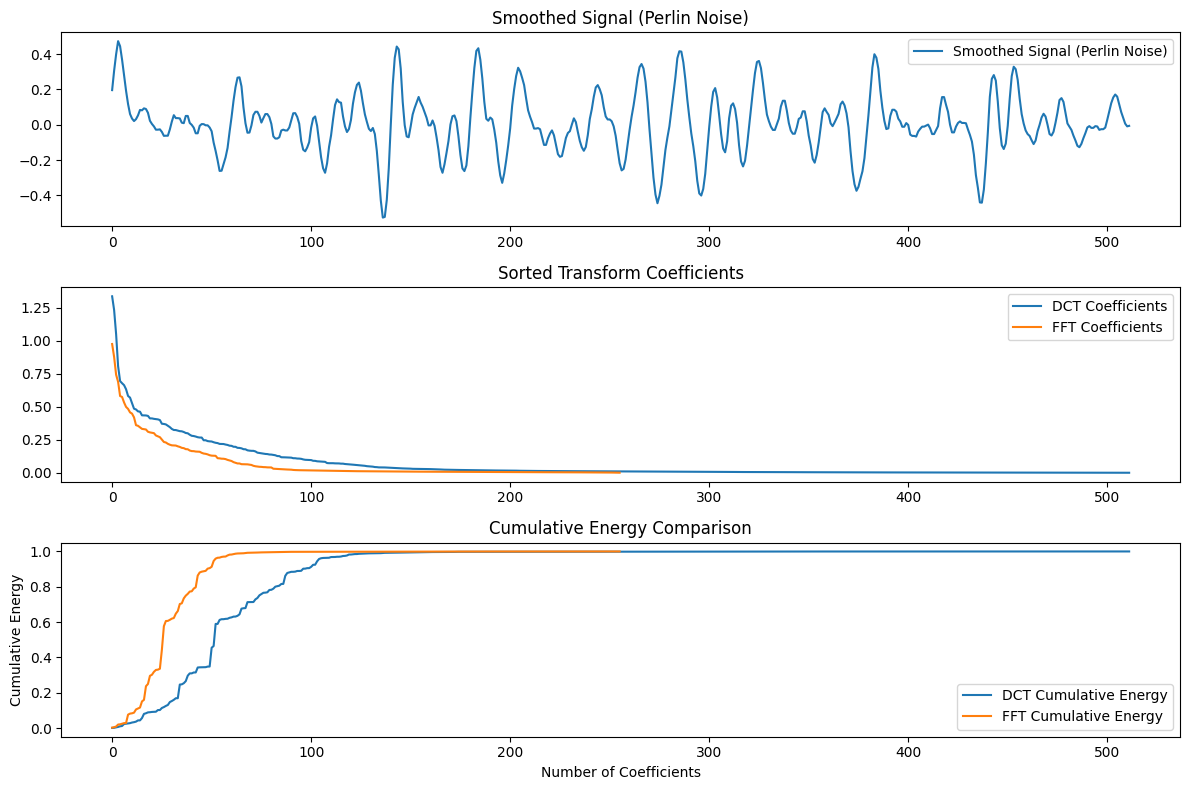

In [9]:
# Smoothing the Perlin noise by averaging adjacent values
x_smoothed = np.convolve(x, np.ones(5)/5, mode='same')  # Moving average filter

# Replace x with x_smoothed in the transform computations
dct_coeffs = dct(x_smoothed, type=2, norm='ortho')
fft_coeffs = fft(x_smoothed) / np.sqrt(n)  # Normalized FFT
fft_coeffs_magnitude = np.abs(fft_coeffs[:n // 2])

# Plot the smoothed signal for comparison
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x_smoothed, label="Smoothed Signal (Perlin Noise)")
plt.title("Smoothed Signal (Perlin Noise)")
plt.legend()

# Repeat other plots with the updated coefficients
plt.subplot(3, 1, 2)
plt.plot(np.sort(np.abs(dct_coeffs))[::-1], label="DCT Coefficients")
plt.plot(np.sort(fft_coeffs_magnitude)[::-1], label="FFT Coefficients")
plt.title("Sorted Transform Coefficients")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(np.cumsum(dct_coeffs**2) / np.sum(dct_coeffs**2), label="DCT Cumulative Energy")
plt.plot(np.cumsum(fft_coeffs_magnitude**2) / np.sum(fft_coeffs_magnitude**2), label="FFT Cumulative Energy")
plt.title("Cumulative Energy Comparison")
plt.xlabel("Number of Coefficients")
plt.ylabel("Cumulative Energy")
plt.legend()

plt.tight_layout()
plt.show()


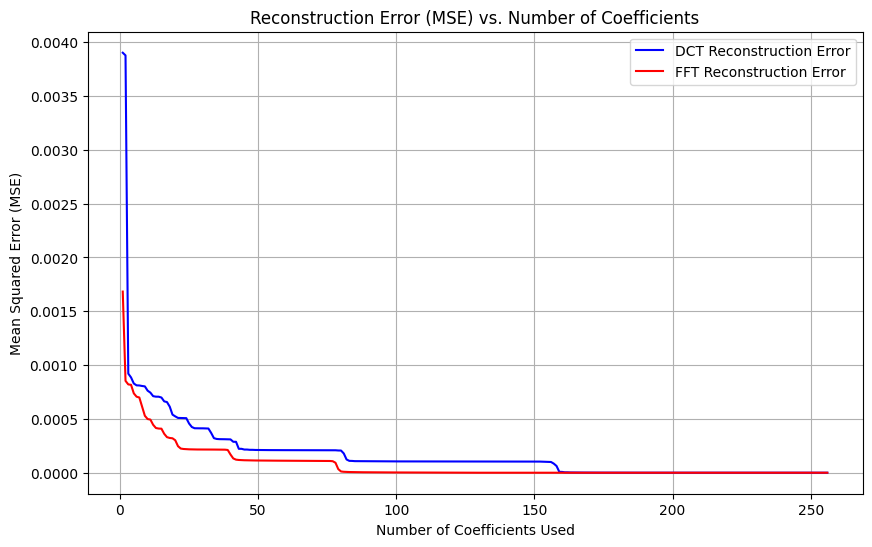

In [19]:
# Generate 1D Perlin noise
n = 256
# x = np.array([pnoise1(i / 10.0, octaves=4) for i in range(n)])
t = np.arange(n)
x = np.cos(2 * np.pi * t / n)  # Cosine wave
for k in [3.1, 7.2, 11.3, 13.4, 17.5, 23.1, 29.11, 57.13, 111.23]:
    x += 0.2 * np.sin(np.sqrt(2) * np.pi * k * t / n)  # Add harmonics

# Normalize the signal
x = x / np.sqrt(np.sum(x**2))  # Normalize to unit energy

# Compute DCT and FFT with proper normalization
dct_coeffs = dct(x, type=2, norm='ortho')
fft_coeffs = fft(x) / np.sqrt(n)

# Reconstruction function
def reconstruct_signal_with_dct(dct_coeffs, k):
    """Reconstruct the signal using the top k DCT coefficients."""
    coeffs = np.zeros_like(dct_coeffs)
    coeffs[:k] = dct_coeffs[:k]  # Keep only the top k coefficients
    return idct(coeffs, type=2, norm='ortho')

def reconstruct_signal_with_fft(fft_coeffs, k):
    """Reconstruct the signal using the top k FFT coefficients."""
    coeffs = np.zeros_like(fft_coeffs, dtype=complex)
    # Keep only the top k coefficients (both positive and negative frequencies)
    coeffs[:k] = fft_coeffs[:k]
    coeffs[-k:] = fft_coeffs[-k:]
    return np.real(ifft(coeffs) * np.sqrt(n))

# Compute MSE for different numbers of coefficients
mse_dct = []
mse_fft = []
num_coeffs = range(1, n + 1)

for k in num_coeffs:
    # Reconstruct the signal
    x_dct_reconstructed = reconstruct_signal_with_dct(dct_coeffs, k)
    x_fft_reconstructed = reconstruct_signal_with_fft(fft_coeffs, k)
    
    # Compute MSE
    mse_dct.append(np.mean((x - x_dct_reconstructed)**2))
    mse_fft.append(np.mean((x - x_fft_reconstructed)**2))

# Plot the MSE comparison
plt.figure(figsize=(10, 6))
plt.plot(num_coeffs, mse_dct, label="DCT Reconstruction Error", color='blue')
plt.plot(num_coeffs, mse_fft, label="FFT Reconstruction Error", color='red')
plt.title("Reconstruction Error (MSE) vs. Number of Coefficients")
plt.xlabel("Number of Coefficients Used")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid()
plt.show()
